In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
# pip install pandas-profiling

In [4]:
# !pip install -U pandas-profiling

In [5]:
df = pd.read_csv('/content/Train_data.csv')

In [6]:
# print(df)
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Topic,Question,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.0,30.5,33.5,7304.0,Total,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.3,29.9,34.7,2581.0,NaN,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.8,30.0,33.6,4723.0,NaN,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.6,29.9,37.6,1153.0,NaN,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,32.8,30.2,35.6,2402.0,NaN,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [7]:
# from pandas_profiling import ProfileReport

In [8]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(df)
# profile.to_file(output_file="op.html")

In [9]:
# The following columns have constant values---------------------------- & will be dropped
print(df['Datasource'].value_counts())
print('---------------------------------')
print(df['Data_Value_Type'].value_counts())
print('---------------------------------')
print(df['Total'].value_counts())
print('---------------------------------')
print(df['DataValueTypeID'].value_counts())


Behavioral Risk Factor Surveillance System    52345
Name: Datasource, dtype: int64
---------------------------------
Value    52345
Name: Data_Value_Type, dtype: int64
---------------------------------
Total    1801
Name: Total, dtype: int64
---------------------------------
VALUE    52345
Name: DataValueTypeID, dtype: int64


In [10]:
dfd = df.drop(['Datasource','Total','Data_Value_Type','DataValueTypeID'], axis = 1) 

In [11]:
dfd

,YearStart,YearEnd,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,2014,IN,Arizona,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,NaN,NaN,NaN,NaN,Hispanic,"(39.766910452000445, -86.14996019399968)",FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables
52341,2014,2014,OK,Oklahoma,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,NaN,NaN,NaN,NaN,NaN,"(35.47203135600046, -97.52107021399968)",FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables
52342,2014,2014,NH,New Hampshire,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,NaN,NaN,NaN,NaN,Asian,"(43.65595011300047, -71.50036091999965)",FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables
52343,2014,2014,WV,West Virginia,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,NaN,NaN,NaN,NaN,NaN,"(38.66551020200046, -80.71264013499967)",FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables


In [12]:
# import pandas as pd
# # from category_encoders import TargetEncoder
# !pip install sklearn
# !pip install --upgrade category_encoders

In [13]:
# from category_encoders import TargetEncoder

In [14]:
dfd.corr()

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,1.000000,-0.007592,-0.005695,-0.009437,-0.008470,0.017269
YearEnd,1.000000,1.000000,-0.007592,-0.005695,-0.009437,-0.008470,0.017269
Data_Value,-0.007592,-0.007592,1.000000,0.952908,0.937098,-0.011943,-0.005280
Low_Confidence_Limit,-0.005695,-0.005695,0.952908,1.000000,0.789363,0.045531,0.016469
High_Confidence_Limit,-0.009437,-0.009437,0.937098,0.789363,1.000000,-0.070979,-0.027234
Sample_Size,-0.008470,-0.008470,-0.011943,0.045531,-0.070979,1.000000,0.176499
LocationID,0.017269,0.017269,-0.005280,0.016469,-0.027234,0.176499,1.000000


In [15]:
# YearEnd & YearStart are highly correleated therefore one will be removed
dfd2 = dfd.drop('YearEnd',axis=1)

In [16]:
dfd2.head()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,NaN,NaN,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,NaN,NaN,Male,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,NaN,NaN,Female,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,NaN,Less than high school,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,NaN,High school graduate,NaN,NaN,NaN,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [17]:
dfd2.isnull().sum()

YearStart                        0
LocationAbbr                     0
LocationDesc                     0
Topic                            0
Question                         0
Data_Value                       0
Low_Confidence_Limit             0
High_Confidence_Limit            0
Sample_Size                      0
Age(years)                   41530
Education                    45592
Gender                       49029
Income                       39123
Race/Ethnicity               42220
GeoLocation                   1057
ClassID                          0
TopicID                          0
QuestionID                       0
LocationID                       0
StratificationCategory1          0
Stratification1                  0
StratificationCategoryId1        0
StratificationID1                0
Class                            0
dtype: int64

In [18]:
dfd2['Education'].isnull().sum()/len(dfd2['Education'])

0.8709905435094087

In [19]:
dfd2['Age(years)'].isnull().sum()/len(dfd2['Age(years)'])

0.7933900085968096

In [20]:
dfd2['Gender'].isnull().sum()/len(dfd2['Gender'])

0.9366510650491928

In [21]:
dfd2['Income'].isnull().sum()/len(dfd2['Income'])


0.7474066290954245

In [22]:
dfd2['Race/Ethnicity'].isnull().sum()/len(dfd2['Race/Ethnicity'])



0.8065717833603974

In [23]:
dfd2['GeoLocation'].isnull().sum()/len(dfd2['GeoLocation'])

0.02019295061610469

In [24]:
# Dropping columns having more 20% missing values & filling the left columns with mean or median

In [25]:
dfdd2 = dfd2.drop(['Education','Race/Ethnicity','Income','Gender','Age(years)'], axis = 1)

In [26]:
dfdd2.head()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status


In [27]:
pq = pd.DataFrame(dfdd2["GeoLocation"])

In [28]:
pq

,GeoLocation
0,"(32.84057112200048, -86.63186076199969)"
1,"(32.84057112200048, -86.63186076199969)"
2,"(32.84057112200048, -86.63186076199969)"
3,"(32.84057112200048, -86.63186076199969)"
4,"(32.84057112200048, -86.63186076199969)"
...,...
52340,"(39.766910452000445, -86.14996019399968)"
52341,"(35.47203135600046, -97.52107021399968)"
52342,"(43.65595011300047, -71.50036091999965)"
52343,"(38.66551020200046, -80.71264013499967)"


In [29]:
dfdd2

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,IN,Arizona,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,"(39.766910452000445, -86.14996019399968)",FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables
52341,2014,OK,Oklahoma,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,"(35.47203135600046, -97.52107021399968)",FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables
52342,2014,NH,New Hampshire,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,"(43.65595011300047, -71.50036091999965)",FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables
52343,2014,WV,West Virginia,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,"(38.66551020200046, -80.71264013499967)",FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables


In [30]:
# df = pd.DataFrame(dfdd2['GeoLocation'].str.split(',',1).tolist(),columns = ['fips','row'])

In [31]:
pq[['A', 'B']] = pq['GeoLocation'].str.split(',', 1, expand=True)

In [32]:
pq[['C', 'D']] = pq['A'].str.split('(', 1, expand=True)

In [33]:
pq[['E', 'F']] = pq['B'].str.split(')', 1, expand=True)

In [34]:
pq

,GeoLocation,A,B,C,D,E,F
0,"(32.84057112200048, -86.63186076199969)",(32.84057112200048,-86.63186076199969),,32.84057112200048,-86.63186076199969,
1,"(32.84057112200048, -86.63186076199969)",(32.84057112200048,-86.63186076199969),,32.84057112200048,-86.63186076199969,
2,"(32.84057112200048, -86.63186076199969)",(32.84057112200048,-86.63186076199969),,32.84057112200048,-86.63186076199969,
3,"(32.84057112200048, -86.63186076199969)",(32.84057112200048,-86.63186076199969),,32.84057112200048,-86.63186076199969,
4,"(32.84057112200048, -86.63186076199969)",(32.84057112200048,-86.63186076199969),,32.84057112200048,-86.63186076199969,
...,...,...,...,...,...,...,...
52340,"(39.766910452000445, -86.14996019399968)",(39.766910452000445,-86.14996019399968),,39.766910452000445,-86.14996019399968,
52341,"(35.47203135600046, -97.52107021399968)",(35.47203135600046,-97.52107021399968),,35.47203135600046,-97.52107021399968,
52342,"(43.65595011300047, -71.50036091999965)",(43.65595011300047,-71.50036091999965),,43.65595011300047,-71.50036091999965,
52343,"(38.66551020200046, -80.71264013499967)",(38.66551020200046,-80.71264013499967),,38.66551020200046,-80.71264013499967,


In [35]:
dfdd2

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,IN,Arizona,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,"(39.766910452000445, -86.14996019399968)",FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables
52341,2014,OK,Oklahoma,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,"(35.47203135600046, -97.52107021399968)",FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables
52342,2014,NH,New Hampshire,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,"(43.65595011300047, -71.50036091999965)",FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables
52343,2014,WV,West Virginia,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,"(38.66551020200046, -80.71264013499967)",FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables


In [36]:
pq = pq.drop(['A','C','B','F'], axis = 1)

In [37]:
pq

,GeoLocation,D,E
0,"(32.84057112200048, -86.63186076199969)",32.84057112200048,-86.63186076199969
1,"(32.84057112200048, -86.63186076199969)",32.84057112200048,-86.63186076199969
2,"(32.84057112200048, -86.63186076199969)",32.84057112200048,-86.63186076199969
3,"(32.84057112200048, -86.63186076199969)",32.84057112200048,-86.63186076199969
4,"(32.84057112200048, -86.63186076199969)",32.84057112200048,-86.63186076199969
...,...,...,...
52340,"(39.766910452000445, -86.14996019399968)",39.766910452000445,-86.14996019399968
52341,"(35.47203135600046, -97.52107021399968)",35.47203135600046,-97.52107021399968
52342,"(43.65595011300047, -71.50036091999965)",43.65595011300047,-71.50036091999965
52343,"(38.66551020200046, -80.71264013499967)",38.66551020200046,-80.71264013499967


In [38]:
dfdd2 = dfdd2.drop('GeoLocation', axis = 1)

In [39]:
pq = pq.drop('GeoLocation', axis = 1)

In [40]:
pq

,D,E
0,32.84057112200048,-86.63186076199969
1,32.84057112200048,-86.63186076199969
2,32.84057112200048,-86.63186076199969
3,32.84057112200048,-86.63186076199969
4,32.84057112200048,-86.63186076199969
...,...,...
52340,39.766910452000445,-86.14996019399968
52341,35.47203135600046,-97.52107021399968
52342,43.65595011300047,-71.50036091999965
52343,38.66551020200046,-80.71264013499967


In [41]:
dfdd2

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,IN,Arizona,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables
52341,2014,OK,Oklahoma,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables
52342,2014,NH,New Hampshire,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables
52343,2014,WV,West Virginia,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables


In [42]:
# pq['GeoLocation'] = pq[['D', 'E']].mean(axis=1)
# pq

In [43]:
pq['P'] = pd.to_numeric(pq['D'], errors ='ignore')
pq['P'].fillna(pq['P'].mean())

0        32.840571
1        32.840571
2        32.840571
3        32.840571
4        32.840571
           ...    
52340    39.766910
52341    35.472031
52342    43.655950
52343    38.665510
52344    43.235541
Name: P, Length: 52345, dtype: float64

In [44]:
pq

,D,E,P
0,32.84057112200048,-86.63186076199969,32.840571
1,32.84057112200048,-86.63186076199969,32.840571
2,32.84057112200048,-86.63186076199969,32.840571
3,32.84057112200048,-86.63186076199969,32.840571
4,32.84057112200048,-86.63186076199969,32.840571
...,...,...,...
52340,39.766910452000445,-86.14996019399968,39.766910
52341,35.47203135600046,-97.52107021399968,35.472031
52342,43.65595011300047,-71.50036091999965,43.655950
52343,38.66551020200046,-80.71264013499967,38.665510


In [45]:
pq['K'] = pd.to_numeric(pq['E'], errors ='ignore')
pq['K'].fillna(pq['K'].mean())

0        -86.631861
1        -86.631861
2        -86.631861
3        -86.631861
4        -86.631861
            ...    
52340    -86.149960
52341    -97.521070
52342    -71.500361
52343    -80.712640
52344   -108.109830
Name: K, Length: 52345, dtype: float64

In [48]:
# pq = pq.drop(['GeoLocation'], axis = 1)

In [50]:
pq = pq.drop(['D','E'], axis = 1)

In [51]:
pq.head()

,P,K
0,32.840571,-86.631861
1,32.840571,-86.631861
2,32.840571,-86.631861
3,32.840571,-86.631861
4,32.840571,-86.631861


In [52]:
dfdd2.isnull().sum()

YearStart                    0
LocationAbbr                 0
LocationDesc                 0
Topic                        0
Question                     0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
Class                        0
dtype: int64

In [53]:
pq.isnull().sum()

P    1057
K    1057
dtype: int64

In [54]:
pq['K'].fillna(pq['K'].mean())

0        -86.631861
1        -86.631861
2        -86.631861
3        -86.631861
4        -86.631861
            ...    
52340    -86.149960
52341    -97.521070
52342    -71.500361
52343    -80.712640
52344   -108.109830
Name: K, Length: 52345, dtype: float64

In [55]:
# saving the dataframe
dfdd2.to_csv('file1.csv')

In [56]:
!cp file1.csv "drive/My Drive/"

cp: cannot create regular file 'drive/My Drive/': No such file or directory


In [57]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(dfdd2)
# profile.to_file(output_file="op2.html")

In [58]:
dfdd2.corr()

,YearStart,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID
YearStart,1.000000,-0.007592,-0.005695,-0.009437,-0.008470,0.017269
Data_Value,-0.007592,1.000000,0.952908,0.937098,-0.011943,-0.005280
Low_Confidence_Limit,-0.005695,0.952908,1.000000,0.789363,0.045531,0.016469
High_Confidence_Limit,-0.009437,0.937098,0.789363,1.000000,-0.070979,-0.027234
Sample_Size,-0.008470,-0.011943,0.045531,-0.070979,1.000000,0.176499
LocationID,0.017269,-0.005280,0.016469,-0.027234,0.176499,1.000000


In [59]:
# dfdd2['D'].fillna(dfdd2['D'].mean())

In [60]:
# dfdd2['K'] = pd.to_numeric(dfdd2['E'], errors ='ignore')
# dfdd2['K'].fillna(dfdd2['K'].mean())

In [61]:
pq['K'] = pq['K'].abs()

In [62]:
pq

,P,K
0,32.840571,86.631861
1,32.840571,86.631861
2,32.840571,86.631861
3,32.840571,86.631861
4,32.840571,86.631861
...,...,...
52340,39.766910,86.149960
52341,35.472031,97.521070
52342,43.655950,71.500361
52343,38.665510,80.712640


In [63]:
col = pq.loc[: , "P":"K"]
pq['G_mean'] = col.mean(axis=1)
pq

,P,K,G_mean
0,32.840571,86.631861,59.736216
1,32.840571,86.631861,59.736216
2,32.840571,86.631861,59.736216
3,32.840571,86.631861,59.736216
4,32.840571,86.631861,59.736216
...,...,...,...
52340,39.766910,86.149960,62.958435
52341,35.472031,97.521070,66.496551
52342,43.655950,71.500361,57.578156
52343,38.665510,80.712640,59.689075


In [64]:
pq = pq.drop(['P','K'], axis = 1)

In [65]:
pq

,G_mean
0,59.736216
1,59.736216
2,59.736216
3,59.736216
4,59.736216
...,...
52340,62.958435
52341,66.496551
52342,57.578156
52343,59.689075


In [66]:
pq.notnull()

,G_mean
0,True
1,True
2,True
3,True
4,True
...,...
52340,True
52341,True
52342,True
52343,True


In [67]:
pq['G_mean'].mean()

66.32964821878369

In [68]:
pq.fillna(66.32964821878369)

,G_mean
0,59.736216
1,59.736216
2,59.736216
3,59.736216
4,59.736216
...,...
52340,62.958435
52341,66.496551
52342,57.578156
52343,59.689075


In [69]:
result = pd.concat([dfdd2, pq], axis=1)

In [70]:
result

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status,59.736216
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status,59.736216
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status,59.736216
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,59.736216
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,59.736216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,IN,Arizona,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables,62.958435
52341,2014,OK,Oklahoma,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables,66.496551
52342,2014,NH,New Hampshire,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables,57.578156
52343,2014,WV,West Virginia,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables,59.689075


In [71]:
# # df['salary_mean'] = col.mean(axis=1)
# # df

# col = dfdd2.loc[: , "P":"K"]
# dfdd2['salary_mean'] = col.mean(axis=1)
# dfdd2

In [72]:
# dfdd2 = dfdd2.drop(['P','K'], axis = 1)

In [73]:
# dfdd2

In [74]:
# dfdd2.rename(columns={"salary_mean": "Geo_mean"})

In [75]:
dfdd2.isnull().sum()

YearStart                    0
LocationAbbr                 0
LocationDesc                 0
Topic                        0
Question                     0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
Class                        0
dtype: int64

In [76]:
X = result.drop("Data_Value",axis=1)   #Feature Matrix
y = result["Data_Value"]

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((36641, 18), (15704, 18))

In [78]:
X_train.corr()

,YearStart,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,G_mean
YearStart,1.000000,-0.010050,-0.011226,-0.014948,0.018313,0.003376
Low_Confidence_Limit,-0.010050,1.000000,0.787445,0.047105,0.013817,-0.003847
High_Confidence_Limit,-0.011226,0.787445,1.000000,-0.068504,-0.029600,0.015839
Sample_Size,-0.014948,0.047105,-0.068504,1.000000,0.177954,-0.030037
LocationID,0.018313,0.013817,-0.029600,0.177954,1.000000,-0.085399
G_mean,0.003376,-0.003847,0.015839,-0.030037,-0.085399,1.000000


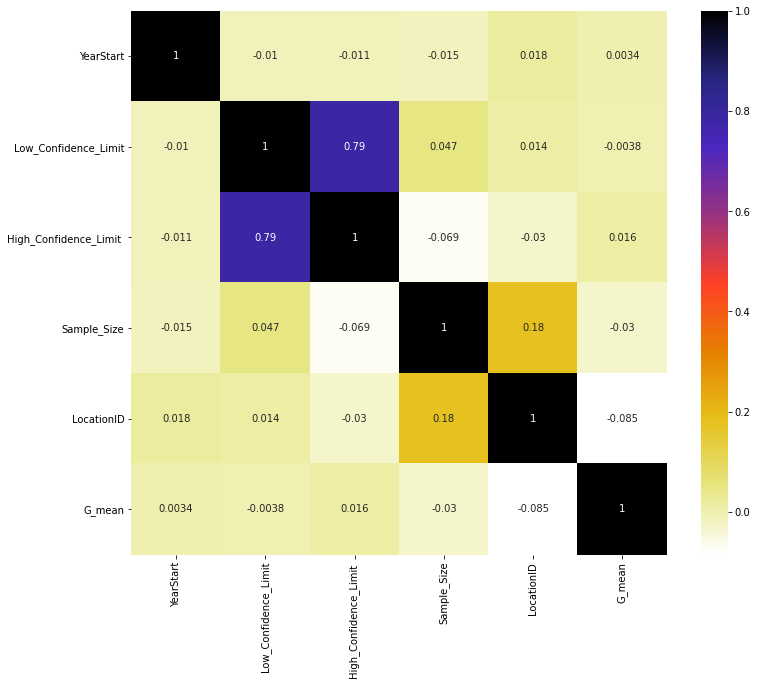

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
!pip install -U pandas-profiling

Requirement already up-to-date: pandas-profiling in /usr/local/lib/python3.7/dist-packages (2.11.0)


In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(result)
# profile.to_file(output_file="op.html")

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [80]:
result.isnull().sum()

YearStart                       0
LocationAbbr                    0
LocationDesc                    0
Topic                           0
Question                        0
Data_Value                      0
Low_Confidence_Limit            0
High_Confidence_Limit           0
Sample_Size                     0
ClassID                         0
TopicID                         0
QuestionID                      0
LocationID                      0
StratificationCategory1         0
Stratification1                 0
StratificationCategoryId1       0
StratificationID1               0
Class                           0
G_mean                       1057
dtype: int64

In [81]:
res2 = result['G_mean'].fillna(66.32964821878369)

In [82]:
result.isnull().sum()

YearStart                       0
LocationAbbr                    0
LocationDesc                    0
Topic                           0
Question                        0
Data_Value                      0
Low_Confidence_Limit            0
High_Confidence_Limit           0
Sample_Size                     0
ClassID                         0
TopicID                         0
QuestionID                      0
LocationID                      0
StratificationCategory1         0
Stratification1                 0
StratificationCategoryId1       0
StratificationID1               0
Class                           0
G_mean                       1057
dtype: int64

In [83]:
result['G_mean']=result['G_mean'].fillna(result['G_mean'].mean())

In [84]:

result.isnull().sum()

YearStart                    0
LocationAbbr                 0
LocationDesc                 0
Topic                        0
Question                     0
Data_Value                   0
Low_Confidence_Limit         0
High_Confidence_Limit        0
Sample_Size                  0
ClassID                      0
TopicID                      0
QuestionID                   0
LocationID                   0
StratificationCategory1      0
Stratification1              0
StratificationCategoryId1    0
StratificationID1            0
Class                        0
G_mean                       0
dtype: int64

In [85]:
result.head()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean
0,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,OWS,OWS1,Q036,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status,59.736216
1,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,OWS,OWS1,Q036,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status,59.736216
2,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,OWS,OWS1,Q036,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status,59.736216
3,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,OWS,OWS1,Q036,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,59.736216
4,2011,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,OWS,OWS1,Q036,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,59.736216


In [86]:
cs = pd.DataFrame(result["LocationAbbr"])

In [87]:
cs.shape

(52345, 1)

In [88]:
pd.get_dummies(cs).shape

(52345, 55)

In [89]:
cs

,LocationAbbr
0,AL
1,AL
2,AL
3,AL
4,AL
...,...
52340,IN
52341,OK
52342,NH
52343,WV


In [90]:

len(cs['LocationAbbr'].unique())

55

In [91]:
cs.LocationAbbr.value_counts().to_dict()

{'AK': 868,
 'AL': 774,
 'AR': 893,
 'AZ': 800,
 'CA': 895,
 'CO': 917,
 'CT': 841,
 'DC': 895,
 'DE': 977,
 'FL': 857,
 'GA': 944,
 'GU': 117,
 'HI': 968,
 'IA': 884,
 'ID': 972,
 'IL': 1075,
 'IN': 1003,
 'KS': 972,
 'KY': 967,
 'LA': 954,
 'MA': 886,
 'MD': 1076,
 'ME': 951,
 'MI': 1063,
 'MN': 1097,
 'MO': 979,
 'MS': 846,
 'MT': 923,
 'NC': 918,
 'ND': 860,
 'NE': 1086,
 'NH': 926,
 'NJ': 1059,
 'NM': 1110,
 'NV': 1098,
 'NY': 1082,
 'OH': 1201,
 'OK': 1090,
 'OR': 990,
 'PA': 1018,
 'PR': 135,
 'RI': 1092,
 'SC': 1031,
 'SD': 940,
 'TN': 965,
 'TX': 1108,
 'US': 1084,
 'UT': 1250,
 'VA': 1129,
 'VI': 1,
 'VT': 1059,
 'WA': 1221,
 'WI': 1148,
 'WV': 1119,
 'WY': 1231}

In [92]:
#  first we make a dictionary that maps each label to the counts
df_frequency_map = cs.LocationAbbr.value_counts().to_dict()

In [93]:
cs.head()

,LocationAbbr
0,AL
1,AL
2,AL
3,AL
4,AL


In [94]:
cs.LocationAbbr = cs.LocationAbbr.map(df_frequency_map)
cs.rename(columns = {'LocationAbbr':'LocAbbr'}, inplace = True)
cs.head()

,LocAbbr
0,774
1,774
2,774
3,774
4,774


In [95]:
cs.rename(columns = {'LocationAbbr':'LocAbbr'}, inplace = True)

In [96]:
cs

,LocAbbr
0,774
1,774
2,774
3,774
4,774
...,...
52340,1003
52341,1090
52342,926
52343,1119


In [97]:
result2 = pd.concat([result, cs], axis=1)

In [98]:
result2 = result2.drop('LocationAbbr',axis=1)

In [99]:
result2.sample(10)

,YearStart,LocationDesc,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean,LocAbbr
40279,2013,Illinois,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,36.010192,30.185950,42.282092,404.046833,FV,FV1,Q018,20.812668,Race/Ethnicity,25 - 34,RACE,AGEYR2534,Fruits and Vegetables,57.179781,1098
23319,2012,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.206838,28.906838,35.706838,1190.191142,OWS,OWS1,Q037,47.269619,Age (years),35 - 44,AGEYR,AGEYR3544,Obesity / Weight Status,65.627005,1108
1012,2011,California,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,14.300000,8.700000,22.500000,138.000000,FV,FV1,Q019,6.000000,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Fruits and Vegetables,79.319320,895
14056,2011,Montana,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,18.496283,15.926469,21.366098,1528.396283,FV,FV1,Q019,41.962079,Income,"$75,000 or greater",INC,INC1525,Fruits and Vegetables,78.245475,1221
33966,2013,North Carolina,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,41.600000,30.000000,54.300000,368.000000,PA,PA1,Q043,37.000000,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Physical Activity,57.312736,918
39518,2013,New Mexico,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.279146,30.001119,34.657172,3059.121060,OWS,OWS1,Q036,44.670398,Gender,Male,GEN,MALE,Obesity / Weight Status,70.380731,1110
30080,2013,Kentucky,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,55.200000,36.800000,72.200000,67.000000,PA,PA1,Q043,21.000000,Race/Ethnicity,American Indian/Alaska Native,RACE,RACENAA,Physical Activity,61.210471,967
19979,2012,Nebraska,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.800000,35.200000,40.500000,2108.000000,OWS,OWS1,Q037,31.000000,Age (years),35 - 44,AGEYR,AGEYR3544,Obesity / Weight Status,70.503381,1086
35808,2013,South Dakota,Physical Activity - Behavior,Percent of adults who achieve at least 150 min...,41.400000,34.400000,48.700000,465.000000,PA,PA1,Q043,46.000000,Education,Less than high school,EDU,EDUHS,Physical Activity,72.363330,940
25385,2012,Florida,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,33.549709,31.408773,35.837623,3169.288497,FV,FV1,Q018,17.530215,Gender,Female,GEN,FEMALE,Fruits and Vegetables,57.119630,1097


In [145]:
ds = pd.DataFrame(result2["LocationDesc"])
# cs = pd.DataFrame(result["LocationAbbr"])

In [146]:
ds.shape

(52345, 1)

In [147]:
pd.get_dummies(ds).shape

(52345, 55)

In [148]:
len(ds['LocationDesc'].unique())


55

In [138]:
ds.LocationDesc.value_counts().to_dict()

{'Alabama': 1204,
 'Alaska': 1070,
 'Arizona': 1167,
 'Arkansas': 1075,
 'California': 1179,
 'Colorado': 1219,
 'Connecticut': 1147,
 'Delaware': 1046,
 'District of Columbia': 951,
 'Florida': 1132,
 'Georgia': 1113,
 'Guam': 128,
 'Hawaii': 1117,
 'Idaho': 1039,
 'Illinois': 1100,
 'Indiana': 1035,
 'Iowa': 1017,
 'Kansas': 1115,
 'Kentucky': 1069,
 'Louisiana': 995,
 'Maine': 967,
 'Maryland': 1163,
 'Massachusetts': 1040,
 'Michigan': 1097,
 'Minnesota': 1163,
 'Mississippi': 800,
 'Missouri': 1048,
 'Montana': 984,
 'National': 1072,
 'Nebraska': 1004,
 'Nevada': 938,
 'New Hampshire': 911,
 'New Jersey': 982,
 'New Mexico': 1039,
 'New York': 986,
 'North Carolina': 962,
 'North Dakota': 873,
 'Ohio': 1017,
 'Oklahoma': 1004,
 'Oregon': 922,
 'Pennsylvania': 875,
 'Puerto Rico': 148,
 'Rhode Island': 1013,
 'South Carolina': 900,
 'South Dakota': 818,
 'Tennessee': 827,
 'Texas': 854,
 'Utah': 936,
 'Vermont': 812,
 'Virgin Islands': 1,
 'Virginia': 901,
 'Washington': 888,
 'We

In [ ]:
# cs.LocationAbbr.value_counts().to_dict()

In [139]:
ds

,LocationDesc
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama
...,...
52340,Arizona
52341,Oklahoma
52342,New Hampshire
52343,West Virginia


In [149]:
#  first we make a dictionary that maps each label to the counts
# df_frequency_map = cs.LocationAbbr.value_counts().to_dict()
ds_frequency_map = ds.LocationDesc.value_counts().to_dict()

In [150]:
ds_frequency_map

{'Alabama': 1204,
 'Alaska': 1070,
 'Arizona': 1167,
 'Arkansas': 1075,
 'California': 1179,
 'Colorado': 1219,
 'Connecticut': 1147,
 'Delaware': 1046,
 'District of Columbia': 951,
 'Florida': 1132,
 'Georgia': 1113,
 'Guam': 128,
 'Hawaii': 1117,
 'Idaho': 1039,
 'Illinois': 1100,
 'Indiana': 1035,
 'Iowa': 1017,
 'Kansas': 1115,
 'Kentucky': 1069,
 'Louisiana': 995,
 'Maine': 967,
 'Maryland': 1163,
 'Massachusetts': 1040,
 'Michigan': 1097,
 'Minnesota': 1163,
 'Mississippi': 800,
 'Missouri': 1048,
 'Montana': 984,
 'National': 1072,
 'Nebraska': 1004,
 'Nevada': 938,
 'New Hampshire': 911,
 'New Jersey': 982,
 'New Mexico': 1039,
 'New York': 986,
 'North Carolina': 962,
 'North Dakota': 873,
 'Ohio': 1017,
 'Oklahoma': 1004,
 'Oregon': 922,
 'Pennsylvania': 875,
 'Puerto Rico': 148,
 'Rhode Island': 1013,
 'South Carolina': 900,
 'South Dakota': 818,
 'Tennessee': 827,
 'Texas': 854,
 'Utah': 936,
 'Vermont': 812,
 'Virgin Islands': 1,
 'Virginia': 901,
 'Washington': 888,
 'We

In [151]:
ds.head()

,LocationDesc
0,Alabama
1,Alabama
2,Alabama
3,Alabama
4,Alabama


In [160]:
ds.LocDesc = ds.LocationDesc.map(ds_frequency_map)
ds.rename(columns = {'LocationDesc':'LocDesc'}, inplace = True)
ds.head()

,LocDesc
0,1204
1,1204
2,1204
3,1204
4,1204


In [161]:
result3 = pd.concat([result2, ds], axis=1)

In [162]:
res = result3.drop('LocationDesc',axis=1)

In [163]:
res.head()

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean,LocAbbr,LocDesc
0,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,30.5,33.5,7304.0,OWS,OWS1,Q036,1.0,Total,Total,OVR,OVERALL,Obesity / Weight Status,59.736216,774,1204
1,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,29.9,34.7,2581.0,OWS,OWS1,Q036,1.0,Gender,Male,GEN,MALE,Obesity / Weight Status,59.736216,774,1204
2,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,30.0,33.6,4723.0,OWS,OWS1,Q036,1.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status,59.736216,774,1204
3,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,29.9,37.6,1153.0,OWS,OWS1,Q036,1.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,59.736216,774,1204
4,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,30.2,35.6,2402.0,OWS,OWS1,Q036,1.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,59.736216,774,1204


In [ ]:
# from pandas_profiling import ProfileReport
# profile = ProfileReport(res)
# profile.to_file(output_file="op5.html")

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [164]:

X = res.drop("Data_Value",axis=1)   #Feature Matrix
y = res["Data_Value"]

In [166]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((36641, 18), (15704, 18))

In [167]:
X_train.corr()

,YearStart,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc
YearStart,1.000000,-0.004776,-0.008914,-0.010167,0.015547,-0.000408,-0.035481,-0.039846
Low_Confidence_Limit,-0.004776,1.000000,0.788181,0.047577,0.016860,-0.009383,-0.000023,0.001141
High_Confidence_Limit,-0.008914,0.788181,1.000000,-0.068938,-0.027066,0.011516,-0.035828,-0.032728
Sample_Size,-0.010167,0.047577,-0.068938,1.000000,0.174558,-0.003316,0.062021,0.057621
LocationID,0.015547,0.016860,-0.027066,0.174558,1.000000,-0.075688,0.499965,-0.688587
G_mean,-0.000408,-0.009383,0.011516,-0.003316,-0.075688,1.000000,0.045634,0.051533
LocAbbr,-0.035481,-0.000023,-0.035828,0.062021,0.499965,0.045634,1.000000,-0.025921
LocDesc,-0.039846,0.001141,-0.032728,0.057621,-0.688587,0.051533,-0.025921,1.000000


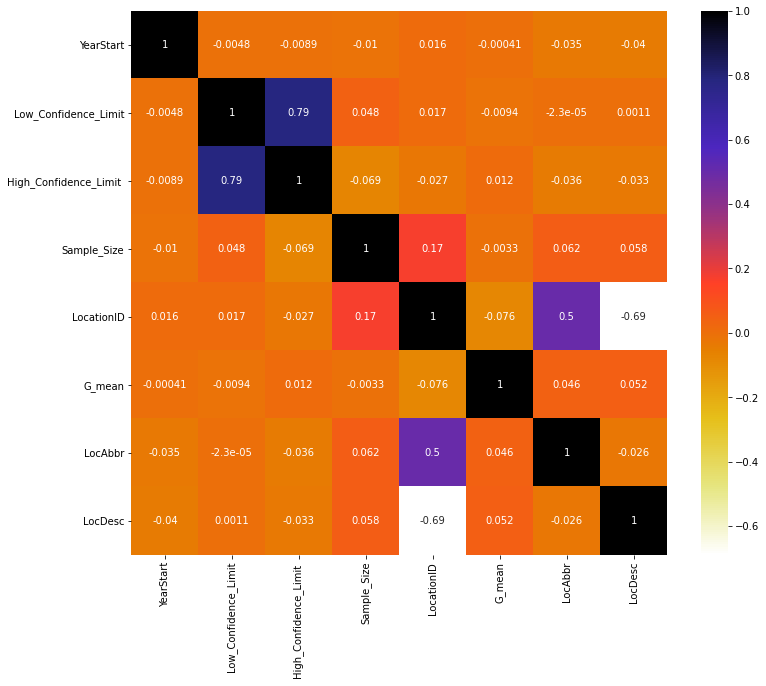

In [168]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [169]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [170]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

1

In [171]:
corr_features

{'High_Confidence_Limit '}

In [172]:
res

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean,LocAbbr,LocDesc
0,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,OWS,OWS1,Q036,1.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status,59.736216,774,1204
1,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,OWS,OWS1,Q036,1.000000,Gender,Male,GEN,MALE,Obesity / Weight Status,59.736216,774,1204
2,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,OWS,OWS1,Q036,1.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status,59.736216,774,1204
3,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,OWS,OWS1,Q036,1.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,59.736216,774,1204
4,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,OWS,OWS1,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,59.736216,774,1204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,FV,FV1,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,Fruits and Vegetables,62.958435,1003,1167
52341,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,FV,FV1,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,Fruits and Vegetables,66.496551,1090,1004
52342,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,FV,FV1,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,Fruits and Vegetables,57.578156,926,911
52343,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,FV,FV1,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,Fruits and Vegetables,59.689075,1119,843


In [173]:
res['Topic'].value_counts()
# one hot

res_copy = res.copy()

In [174]:
# TOPICS,  - onehot
# QUESTION, - label encoding
# CLASSID,
# TOPICID,
# QUESTIONID,
# STATRIFICATIONID1,
# StratificationCategory1
# Stratification
# class

In [175]:

dfres_copy = pd.get_dummies(res_copy, columns=['Topic'])

In [176]:
dfres_copy.sample(5)

,YearStart,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean,LocAbbr,LocDesc,Topic_Fruits and Vegetables - Behavior,Topic_Obesity / Weight Status,Topic_Physical Activity - Behavior
13960,2011,Percent of adults who report consuming vegetab...,16.433088,14.798835,18.084466,4681.287378,FV,FV1,Q019,52.314951,Race/Ethnicity,Non-Hispanic White,GEN,OVERALL,Fruits and Vegetables,82.361240,1221,1040,1,0,0
52202,2014,Percent of adults who report consuming fruit l...,38.000620,33.000852,43.300310,791.996901,FV,FV1,Q018,34.998451,Income,"$15,000 - $24,999",INC,INC1525,Fruits and Vegetables,57.578156,926,911,1,0,0
12826,2011,Percent of adults aged 18 years and older who ...,32.274385,30.826550,33.774385,8388.630882,OWS,OWS1,Q037,23.391711,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,Obesity / Weight Status,61.210471,967,1069,0,1,0
31333,2013,Percent of adults aged 18 years and older who ...,28.700000,25.900000,31.500000,3301.000000,OWS,OWS1,Q036,27.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,70.574925,1097,1163,0,1,0
37057,2013,Percent of adults aged 18 years and older who ...,26.900000,23.500000,30.700000,1263.000000,OWS,OWS1,Q036,53.000000,Income,Data not reported,INC,INCNR,Obesity / Weight Status,83.996145,1221,888,0,1,0


In [177]:
res['Question'].value_counts()
# label encoding

Percent of adults who report consuming fruit less than one time daily                                                                                                                                                                                    9800
Percent of adults who report consuming vegetables less than one time daily                                                                                                                                                                               9664
Percent of adults aged 18 years and older who have an overweight classification                                                                                                                                                                          8671
Percent of adults aged 18 years and older who have obesity                                                                                                                                                                                    

In [178]:
res['ClassID'].value_counts()
# check if highly correlated or not
# one hot 

FV     19464
OWS    16957
PA     15924
Name: ClassID, dtype: int64

In [179]:
res['TopicID'].value_counts()  
# check if hgihly correclted or nto
# one hot

FV1     19464
OWS1    16957
PA1     15924
Name: TopicID, dtype: int64

In [180]:
res['QuestionID'].value_counts()
# label**

Q018    9800
Q019    9664
Q037    8671
Q036    8286
Q047    5362
Q046    2647
Q043    2640
Q044    2638
Q045    2637
Name: QuestionID, dtype: int64

In [181]:
res['StratificationCategory1'].value_counts()
# drop

Income            14777
Age (years)       12351
Race/Ethnicity    10771
Education          8109
Gender             4175
Total              2162
Name: StratificationCategory1, dtype: int64

In [182]:
res['Stratification1'].value_counts()
# DROP

Total                               2389
Some college or technical school    2223
Data not reported                   2208
Less than $15,000                   2195
High school graduate                2180
Male                                2167
Non-Hispanic White                  2159
65 or older                         2105
Female                              2103
18 - 24                             2070
Less than high school               2050
Hispanic                            2046
$15,000 - $24,999                   2041
$50,000 - $74,999                   2010
$35,000 - $49,999                   1992
$25,000 - $34,999                   1990
35 - 44                             1989
45 - 54                             1988
55 - 64                             1984
25 - 34                             1902
College graduate                    1886
2 or more races                     1829
$75,000 or greater                  1801
Non-Hispanic Black                  1624
American Indian/

In [183]:
res['StratificationCategoryId1'].value_counts()
# drop * target

INC      15101
AGEYR    11814
RACE     11055
EDU       8004
GEN       4194
OVR       2177
Name: StratificationCategoryId1, dtype: int64

In [184]:
res['Class'].value_counts()
# one hot

Fruits and Vegetables      19464
Obesity / Weight Status    16957
Physical Activity          15924
Name: Class, dtype: int64

In [185]:
dfres_copy = pd.get_dummies(res_copy, columns=['Class','TopicID','ClassID'])

In [186]:
dfres_copy

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA
0,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,Q036,1.000000,Total,Total,OVR,OVERALL,59.736216,774,1204,0,1,0,0,1,0,0,1,0
1,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,Q036,1.000000,Gender,Male,GEN,MALE,59.736216,774,1204,0,1,0,0,1,0,0,1,0
2,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,Q036,1.000000,Gender,Female,GEN,FEMALE,59.736216,774,1204,0,1,0,0,1,0,0,1,0
3,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,Q036,1.000000,Education,Less than high school,EDU,EDUHS,59.736216,774,1204,0,1,0,0,1,0,0,1,0
4,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,59.736216,774,1204,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,62.958435,1003,1167,1,0,0,1,0,0,1,0,0
52341,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,66.496551,1090,1004,1,0,0,1,0,0,1,0,0
52342,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,57.578156,926,911,1,0,0,1,0,0,1,0,0
52343,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,59.689075,1119,843,1,0,0,1,0,0,1,0,0


In [187]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [188]:
le.fit_transform(dfres_copy['Question'])

array([1, 1, 1, ..., 8, 7, 8])

In [189]:
dfres_copy

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA
0,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.000000,30.500000,33.500000,7304.000000,Q036,1.000000,Total,Total,OVR,OVERALL,59.736216,774,1204,0,1,0,0,1,0,0,1,0
1,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.300000,29.900000,34.700000,2581.000000,Q036,1.000000,Gender,Male,GEN,MALE,59.736216,774,1204,0,1,0,0,1,0,0,1,0
2,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.800000,30.000000,33.600000,4723.000000,Q036,1.000000,Gender,Female,GEN,FEMALE,59.736216,774,1204,0,1,0,0,1,0,0,1,0
3,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,29.900000,37.600000,1153.000000,Q036,1.000000,Education,Less than high school,EDU,EDUHS,59.736216,774,1204,0,1,0,0,1,0,0,1,0
4,2011,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.800000,30.200000,35.600000,2402.000000,Q036,1.000000,Education,High school graduate,EDU,EDUHSGRAD,59.736216,774,1204,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52340,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,43.148744,31.691960,55.396734,159.871859,Q018,8.912060,Race/Ethnicity,Hispanic,RACE,RACEHIS,62.958435,1003,1167,1,0,0,1,0,0,1,0,0
52341,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,47.997376,43.040983,52.881966,825.537695,Q018,41.973763,Income,"$15,000 - $24,999",INC,INC5075,66.496551,1090,1004,1,0,0,1,0,0,1,0,0
52342,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming vegetab...,19.675684,9.617520,36.132657,55.139452,Q019,33.860548,Race/Ethnicity,Asian,RACE,RACEASN,57.578156,926,911,1,0,0,1,0,0,1,0,0
52343,2014,Fruits and Vegetables - Behavior,Percent of adults who report consuming fruit l...,52.539239,40.313500,64.446413,130.535869,Q018,64.886085,Race/Ethnicity,18 - 24,RACE,RACEHIS,59.689075,1119,843,1,0,0,1,0,0,1,0,0


In [190]:
# Assigning numerical values and storing in another column
dfres_copy['Question'] = le.fit_transform(dfres_copy['Question'])
dfres_copy.sample(10)

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA
35645,2013,Physical Activity - Behavior,4,32.600000,28.700000,36.700000,1288.000000,Q045,45.000000,Income,Data not reported,INC,INCNR,57.522096,1031,900,0,0,1,0,0,1,0,0,1
5219,2011,Physical Activity - Behavior,2,48.800000,44.500000,53.000000,1273.000000,Q043,26.000000,Income,"$25,000 - $34,999",INC,INC2535,64.687855,1063,1097,0,0,1,0,0,1,0,0,1
27232,2013,Obesity / Weight Status,0,39.100000,36.800000,41.300000,2984.000000,Q037,8.000000,Age (years),55 - 64,AGEYR,AGEYR5564,72.488726,917,1219,0,1,0,0,1,0,0,1,0
24349,2012,Fruits and Vegetables - Behavior,8,29.120714,23.929605,34.920714,623.822180,Q019,49.274060,Age (years),35 - 44,AGEYR,AGEYR3544,58.071511,1119,1004,1,0,0,1,0,0,1,0,0
12844,2011,Obesity / Weight Status,0,32.160525,28.348420,36.235261,776.615782,Q037,27.252634,Age (years),25 - 34,AGEYR,AGEYR2534,61.141770,846,800,0,1,0,0,1,0,0,1,0
24686,2012,Fruits and Vegetables - Behavior,7,32.506792,17.500000,52.190282,56.270637,Q018,24.000000,Race/Ethnicity,Other,RACE,RACEOTH,57.119630,923,1117,1,0,0,1,0,0,1,0,0
41033,2013,Fruits and Vegetables - Behavior,7,41.498266,37.218440,45.957919,924.806935,Q018,15.000000,Age (years),35 - 44,AGEYR,AGEYR3544,57.106251,1063,1147,1,0,0,1,0,0,1,0,0
29926,2013,Physical Activity - Behavior,5,27.400000,25.400000,29.300000,2671.000000,Q046,20.000000,Age (years),35 - 44,AGEYR,AGEYR3544,68.274261,972,1115,0,0,1,0,0,1,0,0,1
31105,2013,Obesity / Weight Status,1,37.300000,34.600000,40.000000,2095.000000,Q036,26.000000,Age (years),45 - 54,AGEYR,AGEYR4554,64.687855,1063,1097,0,1,0,0,1,0,0,1,0
12009,2011,Obesity / Weight Status,0,38.326028,36.272218,40.497774,3402.614298,Q037,27.434931,Education,College graduate,EDU,EDUCOGRAD,57.202131,1059,982,0,1,0,0,1,0,0,1,0


In [191]:
dfres_copy['QuestionIDDD'] = le.fit_transform(dfres_copy['QuestionID'])
dfres_copy.sample(10)

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA,QuestionIDDD
20657,2012,Obesity / Weight Status,1,35.700000,32.200000,39.300000,939.000000,Q036,40.000000,Age (years),35 - 44,AGEYR,AGEYR3544,66.496551,1090,1004,0,1,0,0,1,0,0,1,0,2
23363,2012,Obesity / Weight Status,0,33.902840,30.716923,37.274675,1588.450888,Q037,8.000000,Income,"$15,000 - $24,999",INC,INC1525,72.488726,917,1219,0,1,0,0,1,0,0,1,0,3
21596,2012,Obesity / Weight Status,0,31.400000,27.600000,35.600000,724.000000,Q037,54.000000,Education,Less than high school,EDU,EDUHS,59.689075,1119,843,0,1,0,0,1,0,0,1,0,3
1892,2011,Obesity / Weight Status,0,28.900000,20.800000,38.600000,277.000000,Q037,11.000000,Income,"$25,000 - $34,999",INC,INC2535,57.961166,895,951,0,1,0,0,1,0,0,1,0,3
49966,2014,Fruits and Vegetables - Behavior,7,41.304431,36.565914,46.238134,819.807414,Q018,1.000000,Income,"Less than $15,000",INC,INCLESS15,59.736216,774,1204,1,0,0,1,0,0,1,0,0,0
5956,2011,Physical Activity - Behavior,5,36.500000,30.100000,43.400000,295.000000,Q046,29.000000,Age (years),18 - 24,AGEYR,AGEYR1824,65.601045,979,1048,0,0,1,0,0,1,0,0,1,7
38890,2013,Obesity / Weight Status,0,39.950028,34.715020,45.485037,756.649916,Q037,10.350084,Income,"$25,000 - $34,999",INC,INC2535,57.106251,1003,1204,0,1,0,0,1,0,0,1,0,3
908,2011,Obesity / Weight Status,1,23.100000,21.800000,24.500000,7159.000000,Q036,6.000000,Gender,Male,GEN,MALE,79.319320,895,1179,0,1,0,0,1,0,0,1,0,2
6576,2011,Fruits and Vegetables - Behavior,8,20.600000,18.700000,22.600000,3690.000000,Q019,31.000000,Income,"$50,000 - $74,999",INC,INC5075,70.503381,1086,1004,1,0,0,1,0,0,1,0,0,1
2456,2011,Physical Activity - Behavior,3,16.800000,15.300000,18.300000,5797.000000,Q044,13.000000,Gender,Female,GEN,FEMALE,58.233631,944,1113,0,0,1,0,0,1,0,0,1,5


In [192]:
dfres_copy = dfres_copy.drop(['Stratification1'],axis=1)

In [193]:
# StratificationCategory1

dfres_copy = dfres_copy.drop(['StratificationCategory1'],axis=1)

In [194]:
dfres_copy.sample(10)

,YearStart,Topic,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA,QuestionIDDD
49026,2014,Obesity / Weight Status,0,33.729368,32.429368,34.929368,10863.040766,Q037,44.608153,OVR,OVERALL,59.327215,1018,875,0,1,0,0,1,0,0,1,0,3
18547,2012,Physical Activity - Behavior,6,23.400000,19.400000,28.000000,803.000000,Q047,12.000000,AGEYR,AGEYR3544,55.430500,857,1132,0,0,1,0,0,1,0,0,1,8
37975,2013,Obesity / Weight Status,1,26.613631,23.655514,29.771747,1515.129864,Q036,40.129864,EDU,EDUHSGRAD,59.185486,1059,938,0,1,0,0,1,0,0,1,0,2
9563,2011,Fruits and Vegetables - Behavior,8,24.400000,22.400000,26.600000,3769.000000,Q019,45.000000,AGEYR,AGEYR65PLUS,57.522096,1031,900,1,0,0,1,0,0,1,0,0,1
48015,2014,Obesity / Weight Status,1,32.500000,29.000000,36.200000,1146.000000,Q036,55.000000,AGEYR,AGEYR4554,67.104781,1148,849,0,1,0,0,1,0,0,1,0,2
42403,2013,Fruits and Vegetables - Behavior,8,17.014630,15.714630,18.414630,5848.110939,Q019,50.000000,OVR,OVERALL,57.578156,1231,911,1,0,0,1,0,0,1,0,0,1
24272,2012,Fruits and Vegetables - Behavior,8,21.448240,16.095100,27.980400,227.776401,Q019,50.000000,AGEYR,AGEYR1824,56.615375,1092,1013,1,0,0,1,0,0,1,0,0,1
16455,2011,Fruits and Vegetables - Behavior,8,7.330195,3.348293,15.384488,82.534634,Q019,37.051707,RACE,RACEASN,61.232235,1201,1017,1,0,0,1,0,0,1,0,0,1
22320,2012,Obesity / Weight Status,1,24.472395,21.608227,27.582084,1751.552099,Q036,12.731259,EDU,EDUCOGRAD,79.023180,972,1039,0,1,0,0,1,0,0,1,0,2
36815,2013,Obesity / Weight Status,1,23.500000,20.000000,27.500000,903.000000,Q036,51.000000,INC,INCNR,58.000286,1129,901,0,1,0,0,1,0,0,1,0,2


In [195]:
pip install category_encoders

     |████████████████████████████████| 81kB 3.4MB/s 


In [196]:
import category_encoders as ce

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [197]:
encoder=ce.TargetEncoder(cols='StratificationCategoryId1')

In [198]:
dfres_copy = dfres_copy.drop(['StratificationCategoryId1'],axis=1)

In [199]:
dfres_copy = dfres_copy.drop(['Topic','QuestionID','StratificationID1'],axis=1)

In [200]:
dfres_copy.sample(10)

,YearStart,Question,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA,QuestionIDDD
7097,2011,3,20.100000,16.500000,24.200000,808.000000,33.000000,57.578156,926,911,0,0,1,0,0,1,0,0,1,5
31545,2013,5,32.200000,19.600000,48.000000,113.000000,27.000000,70.574925,1097,1163,0,0,1,0,0,1,0,0,1,7
27666,2013,1,29.800000,26.900000,32.900000,1480.000000,10.000000,57.293286,977,1046,0,1,0,0,1,0,0,1,0,2
17206,2011,7,42.371422,35.554302,49.457111,451.600088,27.000000,70.574925,1097,1163,1,0,0,1,0,0,1,0,0,0
43497,2013,7,34.787556,28.753393,41.355882,496.422322,2.894420,106.283569,868,1070,1,0,0,1,0,0,1,0,0,0
41243,2013,8,29.778803,26.078803,33.678803,1021.842395,38.684789,59.185486,1201,1048,1,0,0,1,0,0,1,0,0,1
26733,2013,6,15.700000,11.000000,21.900000,351.000000,4.000000,73.314891,800,1167,0,0,1,0,0,1,0,0,1,8
8865,2011,7,37.600000,32.000000,43.600000,626.000000,41.000000,82.361240,990,922,1,0,0,1,0,0,1,0,0,0
39295,2013,1,34.947947,30.983955,39.133270,1109.493157,1.000000,59.736216,774,1204,0,1,0,0,1,0,0,1,0,2
19802,2012,1,22.300000,20.400000,24.400000,2743.000000,30.000000,78.245475,923,984,0,1,0,0,1,0,0,1,0,2


In [201]:

X = dfres_copy.drop("Data_Value",axis=1)   #Feature Matrix
y = dfres_copy["Data_Value"]

In [203]:

# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)

X_train.shape, X_test.shape

((36641, 19), (15704, 19))

In [204]:
X_train

,YearStart,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA,QuestionIDDD
26524,2013,1,20.600000,32.900000,512.000000,4.000000,73.314891,800,1167,0,1,0,0,1,0,0,1,0,2
17471,2011,8,22.911502,31.967423,997.542776,13.440793,57.106251,1076,1147,1,0,0,1,0,0,1,0,0,1
29451,2013,5,18.900000,23.600000,1643.000000,18.000000,62.958435,1003,1035,0,0,1,0,0,1,0,0,1,7
45077,2014,0,27.300000,32.000000,2927.000000,16.000000,79.023180,972,1039,0,1,0,0,1,0,0,1,0,3
45390,2014,0,25.400000,32.700000,921.000000,20.000000,68.274261,972,1115,0,1,0,0,1,0,0,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2011,6,12.000000,19.700000,509.000000,53.000000,83.996145,1221,888,0,0,1,0,0,1,0,0,1,8
44732,2014,6,14.100000,31.500000,123.000000,11.000000,57.961166,895,951,0,0,1,0,0,1,0,0,1,8
38158,2013,1,24.096819,30.959152,1301.505302,24.204242,57.119630,1097,1035,0,1,0,0,1,0,0,1,0,2
860,2011,5,22.600000,26.900000,4397.000000,5.000000,63.511570,893,1075,0,0,1,0,0,1,0,0,1,7


In [205]:
X_train.corr()

,YearStart,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Fruits and Vegetables,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_FV1,TopicID_OWS1,TopicID_PA1,ClassID_FV,ClassID_OWS,ClassID_PA,QuestionIDDD
YearStart,1.000000,-0.074366,-0.004776,-0.008914,-0.010167,0.015547,-0.000408,-0.035481,-0.039846,-0.042961,0.134090,-0.091107,-0.042961,0.134090,-0.091107,-0.042961,0.134090,-0.091107,-0.013995
Question,-0.074366,1.000000,-0.152885,-0.136930,0.005049,-0.001506,-0.014249,0.106297,0.089926,0.813363,-0.855072,0.012745,0.813363,-0.855072,0.012745,0.813363,-0.855072,0.012745,-0.210986
Low_Confidence_Limit,-0.004776,-0.152885,1.000000,0.788181,0.047577,0.016860,-0.009383,-0.000023,0.001141,0.028379,0.035554,-0.066053,0.028379,0.035554,-0.066053,0.028379,0.035554,-0.066053,-0.191291
High_Confidence_Limit,-0.008914,-0.136930,0.788181,1.000000,-0.068938,-0.027066,0.011516,-0.035828,-0.032728,0.039406,0.029659,-0.071674,0.039406,0.029659,-0.071674,0.039406,0.029659,-0.071674,-0.191240
Sample_Size,-0.010167,0.005049,0.047577,-0.068938,1.000000,0.174558,-0.003316,0.062021,0.057621,0.003724,-0.006854,0.003047,0.003724,-0.006854,0.003047,0.003724,-0.006854,0.003047,0.000812
LocationID,0.015547,-0.001506,0.016860,-0.027066,0.174558,1.000000,-0.075688,0.499965,-0.688587,-0.000979,0.006235,-0.005310,-0.000979,0.006235,-0.005310,-0.000979,0.006235,-0.005310,-0.001386
G_mean,-0.000408,-0.014249,-0.009383,0.011516,-0.003316,-0.075688,1.000000,0.045634,0.051533,-0.018690,0.005802,0.013788,-0.018690,0.005802,0.013788,-0.018690,0.005802,0.013788,0.012873
LocAbbr,-0.035481,0.106297,-0.000023,-0.035828,0.062021,0.499965,0.045634,1.000000,-0.025921,0.122448,-0.078048,-0.049619,0.122448,-0.078048,-0.049619,0.122448,-0.078048,-0.049619,-0.081692
LocDesc,-0.039846,0.089926,0.001141,-0.032728,0.057621,-0.688587,0.051533,-0.025921,1.000000,0.104271,-0.067478,-0.041220,0.104271,-0.067478,-0.041220,0.104271,-0.067478,-0.041220,-0.068491
Class_Fruits and Vegetables,-0.042961,0.813363,0.028379,0.039406,0.003724,-0.000979,-0.018690,0.122448,0.104271,1.000000,-0.533899,-0.510484,1.000000,-0.533899,-0.510484,1.000000,-0.533899,-0.510484,-0.726116


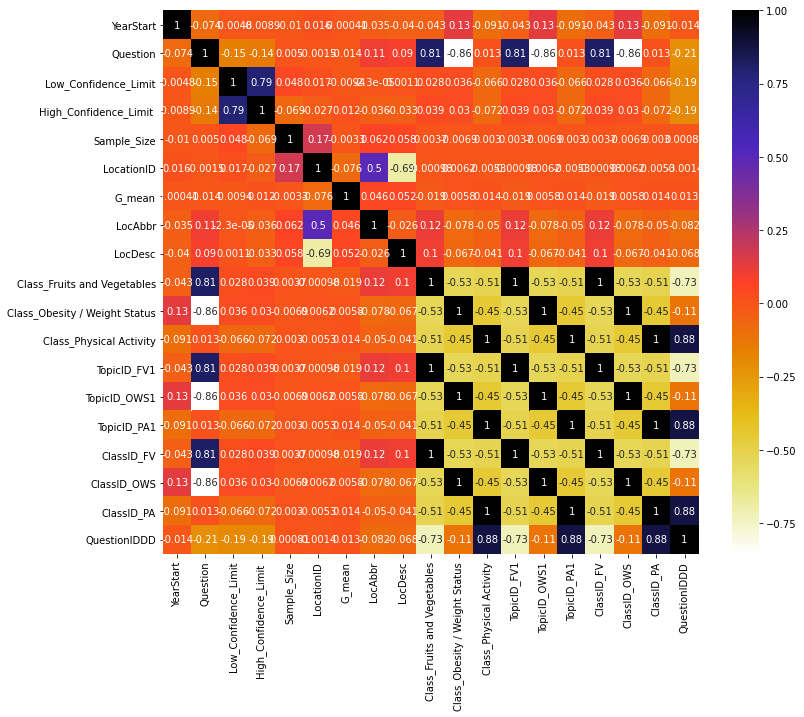

In [206]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [209]:

# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [210]:
corr_features

{'High_Confidence_Limit '}

In [211]:
corr_features = correlation(X_train, 0.75)
len(set(corr_features))

9

In [212]:
corr_features

{'ClassID_FV',
 'ClassID_OWS',
 'ClassID_PA',
 'Class_Fruits and Vegetables',
 'High_Confidence_Limit ',
 'QuestionIDDD',
 'TopicID_FV1',
 'TopicID_OWS1',
 'TopicID_PA1'}

In [213]:

X_train = X_train.drop(corr_features,axis=1)
X_test.drop(corr_features,axis=1)

In [214]:
X_test = X_test.drop(corr_features,axis=1)

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(X_train)
profile.to_file(output_file="f.html")

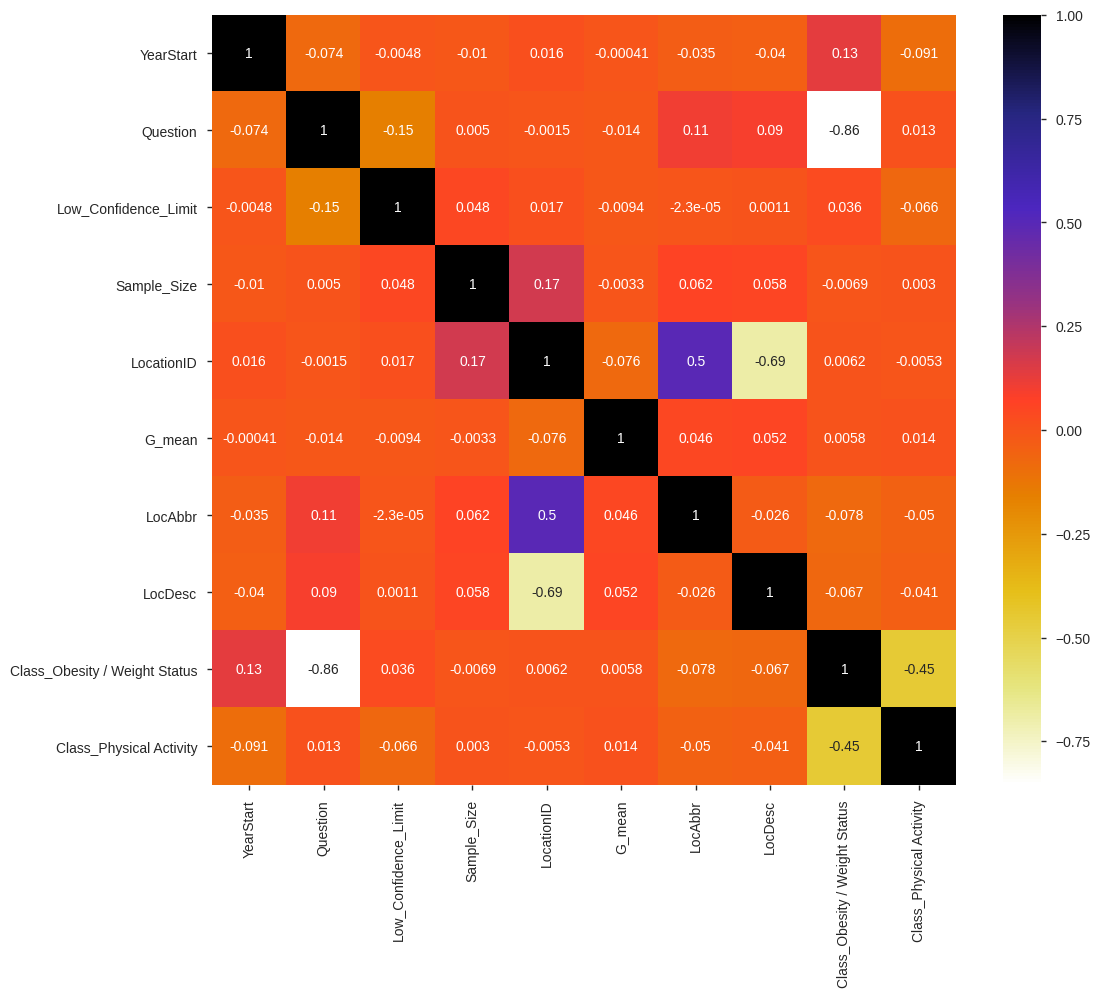

In [216]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [217]:
X_train.sample(10)

,YearStart,Question,Low_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity
23552,2012,8,19.748076,1362.742309,32.126916,59.327215,1018,875,0,0
28806,2013,5,23.000000,753.000000,15.000000,89.581300,968,1117,0,1
44234,2014,0,31.100000,4149.000000,4.000000,73.314891,800,1167,1,0
47011,2014,0,33.700000,1077.000000,40.000000,66.496551,1090,1004,1,0
16161,2011,8,23.342458,4227.021229,40.531844,70.503381,1250,1040,0,0
11434,2011,3,12.200000,519.000000,54.000000,59.689075,1119,843,0,1
15646,2011,8,21.100000,201.158808,18.364769,68.142946,884,1017,0,0
32813,2013,2,46.600000,2646.000000,32.000000,78.282540,1098,938,0,1
51867,2014,7,51.486940,200.339810,27.094442,61.879170,954,995,0,0
5699,2011,3,7.800000,1609.000000,28.000000,61.141770,846,800,0,1


In [218]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()

In [219]:
cols_to_scale = ['YearStart','Question','Low_Confidence_Limit','Sample_Size','LocationID','G_mean','LocAbbr','LocDesc']
# Importing MinMax Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.fit_transform(X_test[cols_to_scale])

In [220]:
X_train.head()

,YearStart,Question,Low_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity
26524,0.666667,0.125,0.295488,0.000973,0.041374,0.490182,0.639712,0.957307,1,0
17471,0.000000,1.000,0.329134,0.001995,0.171575,0.239536,0.860689,0.940887,0,0
29451,0.666667,0.625,0.270742,0.003353,0.234453,0.330033,0.802242,0.848933,0,1
45077,1.000000,0.000,0.393013,0.006056,0.206870,0.578453,0.777422,0.852217,1,0
45390,1.000000,0.000,0.365357,0.001834,0.262035,0.412235,0.777422,0.914614,1,0


In [221]:
X_test.sample(5)

,YearStart,Question,Low_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity
1370,0.000000,0.750,0.222232,0.016063,0.098592,0.470948,0.706090,1.000000,0,1
5688,0.000000,0.375,0.149814,0.002346,0.380282,0.293313,0.643425,0.615949,0,1
31079,0.666667,0.750,0.238164,0.002781,0.338028,0.231289,0.678729,0.835930,0,1
9242,0.000000,0.750,0.381551,0.000472,0.577465,0.264907,0.795234,0.684693,0,1
1668,0.000000,0.000,0.393138,0.001198,0.126761,0.233066,0.759047,0.841430,1,0


In [222]:
from tensorflow.keras import Sequential # import Sequential from tensorflow.keras
from tensorflow.keras.layers import Dense # import Dense from tensorflow.keras.layers
from numpy.random import seed # seed helps you to fix the randomness in the neural network.
import tensorflow

In [223]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(10,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1))

In [225]:
# import RMSprop optimizer
from tensorflow.keras.optimizers import RMSprop
optimizer = RMSprop(0.01) # 0.01 is the learning rate

In [226]:
model.compile(loss='mean_squared_error',optimizer=optimizer) # compile the model

In [231]:
seed_value = 42
seed(seed_value) # If you build the model with given parameters, set_random_seed will help you produce the same result on multiple execution


# Recommended by Keras -------------------------------------------------------------------------------------
# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)
# Recommended by Keras -------------------------------------------------------------------------------------


# 4. Set the `tensorflow` pseudo-random generator at a fixed value
tensorflow.random.set_seed(seed_value)
model.fit(X_train, y_train, epochs=100, batch_size=20, verbose = 1) # fit the model

Epoch 1/100
1833/1833 [==============================] - 6s 3ms/step - loss: 1.4332
Epoch 2/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.4214
Epoch 3/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.4146
Epoch 4/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.4298
Epoch 5/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.3939
Epoch 6/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.4052
Epoch 7/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.3997
Epoch 8/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.3809
Epoch 9/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.4008
Epoch 10/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.3998
Epoch 11/100
1833/1833 [==============================] - 5s 3ms/step - loss: 1.3888
Epoch 12/100
1833/1833 [==============================] - 5s 3ms/step - lo

In [232]:
pred = model.predict(X_test)

In [233]:
from sklearn.metrics import mean_squared_error

In [254]:
print('Root Mean Squared Error is: ', np.sqrt(mean_squared_error(y_test, pred)))

# y_val is the original target value of the validation set (X_val)
# pred is the predicted target value of the validation set

Root Mean Squared Error is:  1.0898712191956759


In [352]:
test_data = pd.read_csv('/content/Test_data.csv')

In [353]:
test_data

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Topic,Question,Data_Value_Type,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,Total,Age(years),Education,Gender,Income,Race/Ethnicity,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
0,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,34.900000,35.500000,438479.000000,Total,NaN,NaN,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status
1,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,40.600000,41.500000,198440.000000,NaN,NaN,NaN,Male,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.000000,Gender,Male,GEN,MALE,Obesity / Weight Status
2,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,28.900000,29.700000,240000.000000,NaN,NaN,NaN,Female,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status
3,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.600000,35.700000,32325.000000,NaN,NaN,Less than high school,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status
4,2016,2016,US,National,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.700000,34.800000,123241.000000,NaN,NaN,High school graduate,NaN,NaN,NaN,NaN,OWS,OWS1,Q037,VALUE,59.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2016,2016,IN,Indiana,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,33.888482,38.488482,2372.000000,NaN,55 - 64,NaN,NaN,NaN,NaN,"(39.766910452000445, -86.14996019399968)",OWS,OWS1,Q037,VALUE,20.000000,Age (years),55 - 64,AGEYR,AGEYR5564,Obesity / Weight Status
4632,2016,2016,VA,Virginia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,34.488830,40.454994,1807.000000,NaN,35 - 44,NaN,NaN,NaN,NaN,"(37.54268067400045, -78.45789046299967)",OWS,OWS1,Q037,VALUE,51.000000,Age (years),55 - 64,AGEYR,AGEYR5564,Obesity / Weight Status
4633,2016,2016,UT,Utah,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,27.592218,32.492218,2507.000000,NaN,NaN,NaN,NaN,NaN,NaN,"(39.360700171000474, -111.58713063499971)",OWS,OWS1,Q037,VALUE,55.000000,Education,Female,GEN,FEMALE,Obesity / Weight Status
4634,2016,2016,WV,West Virginia,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,Value,31.339865,57.807472,94.227741,NaN,NaN,NaN,NaN,NaN,2 or more races,"(38.66551020200046, -80.71264013499967)",OWS,OWS1,Q036,VALUE,51.309619,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,Obesity / Weight Status


In [354]:
test_data = test_data.drop(['Education','Race/Ethnicity','Income','Gender','Age(years)'],axis=1)

In [355]:
test_data = test_data.drop(['Datasource','Total','Data_Value_Type','DataValueTypeID'],axis=1)

In [356]:
test_data = test_data.drop(["YearEnd"],axis=1)

In [357]:
test_data.sample(10)

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class
3866,2016,SC,South Carolina,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,14.6,41.1,71.0,"(33.998821303000454, -81.04537120699968)",PA,PA1,Q047,45.0,Race/Ethnicity,Asian,RACE,RACEASN,Physical Activity
116,2016,AL,Alabama,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.0,35.5,717.0,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q037,1.0,Age (years),25 - 34,AGEYR,AGEYR2534,Obesity / Weight Status
670,2016,MN,Minnesota,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.5,35.8,1767.0,"(46.35564873600049, -94.79420050299967)",OWS,OWS1,Q037,27.0,Income,Data not reported,INC,INCNR,Obesity / Weight Status
1885,2016,KS,Kansas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,8.0,27.1,97.0,"(38.34774030000045, -98.20078122699965)",OWS,OWS1,Q036,20.0,Race/Ethnicity,Asian,RACE,RACEASN,Obesity / Weight Status
3705,2016,ND,North Dakota,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,12.6,19.2,595.0,"(47.47531977900047, -100.11842104899966)",PA,PA1,Q047,38.0,Age (years),35 - 44,AGEYR,AGEYR3544,Physical Activity
1151,2016,TX,Texas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,23.7,34.2,1061.0,"(31.827240407000488, -99.42677020599967)",OWS,OWS1,Q037,48.0,Income,"Less than $15,000",INC,INCLESS15,Obesity / Weight Status
45,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,37.6,38.7,120901.0,NaN,OWS,OWS1,Q037,59.0,Income,"$75,000 or greater",INC,INC75PLUS,Obesity / Weight Status
3700,2016,ND,North Dakota,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,25.6,31.0,1647.0,"(47.47531977900047, -100.11842104899966)",PA,PA1,Q047,38.0,Education,High school graduate,EDU,EDUHSGRAD,Physical Activity
586,2016,MD,Maryland,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,38.3,41.8,6221.0,"(39.29058096400047, -76.60926011099963)",OWS,OWS1,Q037,24.0,Age (years),65 or older,AGEYR,AGEYR65PLUS,Obesity / Weight Status
1560,2016,AR,Arkansas,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,25.2,37.6,602.0,"(34.74865012400045, -92.27449074299966)",OWS,OWS1,Q036,5.0,Income,"$50,000 - $74,999",INC,INC5075,Obesity / Weight Status


In [358]:
test_data.isnull().sum()

YearStart                     0
LocationAbbr                  0
LocationDesc                  0
Topic                         0
Question                      0
Low_Confidence_Limit          0
High_Confidence_Limit         0
Sample_Size                   0
GeoLocation                  91
ClassID                       0
TopicID                       0
QuestionID                    0
LocationID                    0
StratificationCategory1       0
Stratification1               0
StratificationCategoryId1     0
StratificationID1             0
Class                         0
dtype: int64

In [359]:
# tq = pd.DataFrame(test_data["GeoLocation"])

In [360]:
# tq[['A', 'B']] = tq['GeoLocation'].str.split(',', 1, expand=True)

In [361]:
# tq[['C', 'D']] = tq['A'].str.split('(', 1, expand=True)

In [362]:
# tq[['E', 'F']] = tq['B'].str.split(')', 1, expand=True)

In [363]:
# tq

In [364]:
# tq = tq.drop(['A','C','B','F'], axis = 1)

In [365]:
# tq.sample(10)

In [366]:
# pq = tq.drop('GeoLocation', axis = 1)

In [367]:
# pq

In [368]:
# pq.isnull().sum()


In [369]:
pq = pd.DataFrame(test_data["GeoLocation"])

pq[['A', 'B']] = pq['GeoLocation'].str.split(',', 1, expand=True)

pq[['C', 'D']] = pq['A'].str.split('(', 1, expand=True)

pq[['E', 'F']] = pq['B'].str.split(')', 1, expand=True)

pq = pq.drop(['A','C','B','F'], axis = 1)

In [370]:
pq

,GeoLocation,D,E
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
4631,"(39.766910452000445, -86.14996019399968)",39.766910452000445,-86.14996019399968
4632,"(37.54268067400045, -78.45789046299967)",37.54268067400045,-78.45789046299967
4633,"(39.360700171000474, -111.58713063499971)",39.360700171000474,-111.58713063499971
4634,"(38.66551020200046, -80.71264013499967)",38.66551020200046,-80.71264013499967


In [371]:

test_data = test_data.drop('GeoLocation', axis = 1)

pq = pq.drop('GeoLocation', axis = 1)

pq

,D,E
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
4631,39.766910452000445,-86.14996019399968
4632,37.54268067400045,-78.45789046299967
4633,39.360700171000474,-111.58713063499971
4634,38.66551020200046,-80.71264013499967


In [372]:
pq['P'] = pd.to_numeric(pq['D'], errors ='ignore')

pq['P'].fillna(pq['P'].mean())


0       38.507983
1       38.507983
2       38.507983
3       38.507983
4       38.507983
          ...    
4631    39.766910
4632    37.542681
4633    39.360700
4634    38.665510
4635    37.638640
Name: P, Length: 4636, dtype: float64

In [373]:
pq['K'] = pd.to_numeric(pq['E'], errors ='ignore')

pq['K'].fillna(pq['K'].mean())


0       -88.029353
1       -88.029353
2       -88.029353
3       -88.029353
4       -88.029353
           ...    
4631    -86.149960
4632    -78.457890
4633   -111.587131
4634    -80.712640
4635   -121.000000
Name: K, Length: 4636, dtype: float64

In [374]:
pq

,D,E,P,K
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4631,39.766910452000445,-86.14996019399968,39.766910,-86.149960
4632,37.54268067400045,-78.45789046299967,37.542681,-78.457890
4633,39.360700171000474,-111.58713063499971,39.360700,-111.587131
4634,38.66551020200046,-80.71264013499967,38.665510,-80.712640


In [375]:
pq['K'].fillna(pq['K'].mean())

0       -88.029353
1       -88.029353
2       -88.029353
3       -88.029353
4       -88.029353
           ...    
4631    -86.149960
4632    -78.457890
4633   -111.587131
4634    -80.712640
4635   -121.000000
Name: K, Length: 4636, dtype: float64

In [376]:
pq['K'] = pq['K'].abs()

In [377]:

pq

,D,E,P,K
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
4631,39.766910452000445,-86.14996019399968,39.766910,86.149960
4632,37.54268067400045,-78.45789046299967,37.542681,78.457890
4633,39.360700171000474,-111.58713063499971,39.360700,111.587131
4634,38.66551020200046,-80.71264013499967,38.665510,80.712640


In [378]:
pq.isnull().sum()

D    91
E    91
P    91
K    91
dtype: int64

In [379]:
pq['P']=pq['P'].fillna(pq['P'].mean())

In [380]:
pq['K']=pq['K'].fillna(pq['K'].mean())

In [381]:
pq.isnull().sum()

D    91
E    91
P     0
K     0
dtype: int64

In [382]:
pq

,D,E,P,K
0,NaN,NaN,38.507983,93.317749
1,NaN,NaN,38.507983,93.317749
2,NaN,NaN,38.507983,93.317749
3,NaN,NaN,38.507983,93.317749
4,NaN,NaN,38.507983,93.317749
...,...,...,...,...
4631,39.766910452000445,-86.14996019399968,39.766910,86.149960
4632,37.54268067400045,-78.45789046299967,37.542681,78.457890
4633,39.360700171000474,-111.58713063499971,39.360700,111.587131
4634,38.66551020200046,-80.71264013499967,38.665510,80.712640


In [383]:
col = pq.loc[: , "P":"K"]

pq['G_mean'] = col.mean(axis=1)

pq

,D,E,P,K,G_mean
0,NaN,NaN,38.507983,93.317749,65.912866
1,NaN,NaN,38.507983,93.317749,65.912866
2,NaN,NaN,38.507983,93.317749,65.912866
3,NaN,NaN,38.507983,93.317749,65.912866
4,NaN,NaN,38.507983,93.317749,65.912866
...,...,...,...,...,...
4631,39.766910452000445,-86.14996019399968,39.766910,86.149960,62.958435
4632,37.54268067400045,-78.45789046299967,37.542681,78.457890,58.000286
4633,39.360700171000474,-111.58713063499971,39.360700,111.587131,75.473915
4634,38.66551020200046,-80.71264013499967,38.665510,80.712640,59.689075


In [384]:
pq = pq.drop(['D','E'], axis = 1)



In [385]:
pq.isnull().sum()

P         0
K         0
G_mean    0
dtype: int64

In [386]:

test_result = pd.concat([test_data, pq], axis=1)

In [387]:
test_result.head()

,YearStart,LocationAbbr,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,P,K,G_mean
0,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.9,35.5,438479.0,OWS,OWS1,Q037,59.0,Total,Total,OVR,OVERALL,Obesity / Weight Status,38.507983,93.317749,65.912866
1,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.6,41.5,198440.0,OWS,OWS1,Q037,59.0,Gender,Male,GEN,MALE,Obesity / Weight Status,38.507983,93.317749,65.912866
2,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.9,29.7,240000.0,OWS,OWS1,Q037,59.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status,38.507983,93.317749,65.912866
3,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,35.7,32325.0,OWS,OWS1,Q037,59.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,38.507983,93.317749,65.912866
4,2016,US,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.7,34.8,123241.0,OWS,OWS1,Q037,59.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,38.507983,93.317749,65.912866


In [388]:
cs = pd.DataFrame(test_result["LocationAbbr"])

print(cs.shape)

print("after one hot encoding",pd.get_dummies(cs).shape)


print(cs.sample(10))

print(cs.LocationAbbr.value_counts().to_dict())


#  first we make a dictionary that maps each label to the counts
df_frequency_map = cs.LocationAbbr.value_counts().to_dict()

cs.LocationAbbr = cs.LocationAbbr.map(df_frequency_map)
cs.rename(columns = {'LocationAbbr':'LocAbbr'}, inplace = True)
print(cs.head())

cs.rename(columns = {'LocationAbbr':'LocAbbr'}, inplace = True)



(4636, 1)
after one hot encoding (4636, 55)
     LocationAbbr
196            CA
4278           CT
2394           OR
2691           WI
2066           MS
1522           AZ
3996           VA
3485           MO
4065           WI
1089           SC
{'WA': 95, 'NV': 94, 'FL': 93, 'US': 92, 'NC': 91, 'CA': 91, 'SC': 91, 'OR': 90, 'WI': 89, 'VA': 89, 'NM': 89, 'KS': 89, 'VT': 88, 'CO': 88, 'RI': 88, 'MN': 87, 'IN': 87, 'DC': 87, 'NY': 87, 'MO': 86, 'HI': 86, 'DE': 86, 'TN': 85, 'CT': 85, 'MD': 85, 'MI': 84, 'OH': 84, 'GU': 84, 'AZ': 84, 'NE': 84, 'AR': 83, 'ND': 83, 'PA': 83, 'KY': 83, 'MA': 83, 'LA': 83, 'UT': 83, 'TX': 83, 'ME': 82, 'WV': 82, 'MT': 81, 'AL': 80, 'NJ': 80, 'OK': 79, 'GA': 79, 'IL': 79, 'ID': 78, 'IA': 78, 'NH': 78, 'SD': 78, 'VI': 78, 'WY': 77, 'MS': 76, 'AK': 76, 'PR': 73}
   LocAbbr
0       92
1       92
2       92
3       92
4       92


In [389]:
cs

,LocAbbr
0,92
1,92
2,92
3,92
4,92
...,...
4631,87
4632,89
4633,83
4634,82


In [390]:
test_result2 = pd.concat([test_result, cs], axis=1)


test_result2 = test_result2.drop('LocationAbbr',axis=1)



In [391]:
test_result2.head()


,YearStart,LocationDesc,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,P,K,G_mean,LocAbbr
0,2016,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.9,35.5,438479.0,OWS,OWS1,Q037,59.0,Total,Total,OVR,OVERALL,Obesity / Weight Status,38.507983,93.317749,65.912866,92
1,2016,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.6,41.5,198440.0,OWS,OWS1,Q037,59.0,Gender,Male,GEN,MALE,Obesity / Weight Status,38.507983,93.317749,65.912866,92
2,2016,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.9,29.7,240000.0,OWS,OWS1,Q037,59.0,Gender,Female,GEN,FEMALE,Obesity / Weight Status,38.507983,93.317749,65.912866,92
3,2016,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,35.7,32325.0,OWS,OWS1,Q037,59.0,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,38.507983,93.317749,65.912866,92
4,2016,National,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.7,34.8,123241.0,OWS,OWS1,Q037,59.0,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,38.507983,93.317749,65.912866,92


In [392]:
ps = pd.DataFrame(test_result["LocationDesc"])

print(ps.shape)

print("after one hot encoding",pd.get_dummies(ps).shape)


print(ps.sample(10))

print(ps.LocationDesc.value_counts().to_dict())


#  first we make a dictionary that maps each label to the counts
df_frequency_map = ps.LocationDesc.value_counts().to_dict()

ps.LocationDesc = ps.LocationDesc.map(df_frequency_map)
ps.rename(columns = {'LocationDesc':'LocDesc'}, inplace = True)
print(ps.head())

# cs.rename(columns = {'LocationAbbr':'LocAbbr'}, inplace = True)

(4636, 1)
after one hot encoding (4636, 55)
        LocationDesc
3479        Missouri
3865  South Carolina
3387   Massachusetts
2925         Arizona
3312       Louisiana
3318       Louisiana
2819        Illinois
4394         Vermont
125          Alabama
3320       Louisiana
{'Washington': 93, 'National': 92, 'South Carolina': 92, 'Missouri': 90, 'Nevada': 90, 'Kansas': 90, 'Wisconsin': 90, 'California': 90, 'Florida': 90, 'Arkansas': 89, 'Nebraska': 88, 'Maryland': 88, 'Vermont': 88, 'Oregon': 88, 'Tennessee': 88, 'North Carolina': 87, 'Michigan': 87, 'Minnesota': 87, 'Colorado': 87, 'New York': 87, 'Arizona': 87, 'New Mexico': 86, 'Hawaii': 86, 'Kentucky': 86, 'Massachusetts': 86, 'Texas': 86, 'Connecticut': 86, 'District of Columbia': 85, 'Virginia': 85, 'Ohio': 84, 'Delaware': 84, 'Montana': 84, 'Maine': 84, 'Rhode Island': 83, 'Indiana': 83, 'Louisiana': 83, 'Guam': 82, 'Utah': 82, 'Pennsylvania': 82, 'North Dakota': 81, 'Iowa': 81, 'Georgia': 80, 'Alabama': 80, 'Illinois': 80, 'We

In [393]:
ps

,LocDesc
0,92
1,92
2,92
3,92
4,92
...,...
4631,83
4632,85
4633,82
4634,80


In [394]:
# test_result2 = pd.concat([test_result, cs], axis=1)


# test_result2 = test_result2.drop('LocationAbbr',axis=1)



In [395]:
test_result3 = pd.concat([test_result2, ps], axis=1)


test_result3 = test_result3.drop('LocationDesc',axis=1)


In [396]:
test_result3.sample(5)

,YearStart,Topic,Question,Low_Confidence_Limit,High_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,P,K,G_mean,LocAbbr,LocDesc
3503,2016,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,15.4,20.3,1798.0,PA,PA1,Q047,30.0,Education,Some college or technical school,EDU,EDUCOTEC,Physical Activity,47.066529,109.424421,78.245475,81,84
1178,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.1,40.6,797.0,OWS,OWS1,Q037,49.0,Income,"$25,000 - $34,999",INC,INC2535,Obesity / Weight Status,39.360700,111.587131,75.473915,83,82
189,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.6,40.2,1754.0,OWS,OWS1,Q037,6.0,Age (years),45 - 54,AGEYR,AGEYR4554,Obesity / Weight Status,37.638640,121.000000,79.319320,91,90
2892,2016,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,14.0,30.7,371.0,PA,PA1,Q047,2.0,Age (years),35 - 44,AGEYR,AGEYR3544,Physical Activity,64.845080,147.722059,106.283569,76,76
855,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,30.8,41.7,517.0,OWS,OWS1,Q037,35.0,Age (years),25 - 34,AGEYR,AGEYR2534,Obesity / Weight Status,34.520881,106.240581,70.380731,89,86


In [ ]:
{'ClassID_FV',
 'ClassID_OWS',
 'ClassID_PA',
 'Class_Fruits and Vegetables',
 'High_Confidence_Limit ',
 'QuestionIDDD',
 'TopicID_FV1',
 'TopicID_OWS1',
 'TopicID_PA1'}

In [399]:
# test_result3 = test_result3.drop(['High_Confidence_Limit '], axis = 1)
test_result3 = test_result3.drop(['P','K'], axis = 1)


In [400]:
test_result3

,YearStart,Topic,Question,Low_Confidence_Limit,Sample_Size,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Class,G_mean,LocAbbr,LocDesc
0,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.900000,438479.000000,OWS,OWS1,Q037,59.000000,Total,Total,OVR,OVERALL,Obesity / Weight Status,65.912866,92,92
1,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,40.600000,198440.000000,OWS,OWS1,Q037,59.000000,Gender,Male,GEN,MALE,Obesity / Weight Status,65.912866,92,92
2,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,28.900000,240000.000000,OWS,OWS1,Q037,59.000000,Gender,Female,GEN,FEMALE,Obesity / Weight Status,65.912866,92,92
3,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.600000,32325.000000,OWS,OWS1,Q037,59.000000,Education,Less than high school,EDU,EDUHS,Obesity / Weight Status,65.912866,92,92
4,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.700000,123241.000000,OWS,OWS1,Q037,59.000000,Education,High school graduate,EDU,EDUHSGRAD,Obesity / Weight Status,65.912866,92,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.888482,2372.000000,OWS,OWS1,Q037,20.000000,Age (years),55 - 64,AGEYR,AGEYR5564,Obesity / Weight Status,62.958435,87,83
4632,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,34.488830,1807.000000,OWS,OWS1,Q037,51.000000,Age (years),55 - 64,AGEYR,AGEYR5564,Obesity / Weight Status,58.000286,89,85
4633,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,27.592218,2507.000000,OWS,OWS1,Q037,55.000000,Education,Female,GEN,FEMALE,Obesity / Weight Status,75.473915,83,82
4634,2016,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.339865,94.227741,OWS,OWS1,Q036,51.309619,Race/Ethnicity,2 or more races,RACE,RACE2PLUS,Obesity / Weight Status,59.689075,82,80


In [ ]:
test_result3 = test_result3.drop(['Topic','QuestionID','StratificationID1'], axis = 1)


In [351]:
test_result3

,YearStart,Question,Low_Confidence_Limit,Sample_Size,ClassID,TopicID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,Class,G_mean,LocAbbr,LocDesc
0,2016,Percent of adults aged 18 years and older who ...,34.900000,438479.000000,OWS,OWS1,59.000000,Total,Total,OVR,Obesity / Weight Status,65.912866,92,92
1,2016,Percent of adults aged 18 years and older who ...,40.600000,198440.000000,OWS,OWS1,59.000000,Gender,Male,GEN,Obesity / Weight Status,65.912866,92,92
2,2016,Percent of adults aged 18 years and older who ...,28.900000,240000.000000,OWS,OWS1,59.000000,Gender,Female,GEN,Obesity / Weight Status,65.912866,92,92
3,2016,Percent of adults aged 18 years and older who ...,33.600000,32325.000000,OWS,OWS1,59.000000,Education,Less than high school,EDU,Obesity / Weight Status,65.912866,92,92
4,2016,Percent of adults aged 18 years and older who ...,33.700000,123241.000000,OWS,OWS1,59.000000,Education,High school graduate,EDU,Obesity / Weight Status,65.912866,92,92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2016,Percent of adults aged 18 years and older who ...,33.888482,2372.000000,OWS,OWS1,20.000000,Age (years),55 - 64,AGEYR,Obesity / Weight Status,62.958435,87,83
4632,2016,Percent of adults aged 18 years and older who ...,34.488830,1807.000000,OWS,OWS1,51.000000,Age (years),55 - 64,AGEYR,Obesity / Weight Status,58.000286,89,85
4633,2016,Percent of adults aged 18 years and older who ...,27.592218,2507.000000,OWS,OWS1,55.000000,Education,Female,GEN,Obesity / Weight Status,75.473915,83,82
4634,2016,Percent of adults aged 18 years and older who ...,31.339865,94.227741,OWS,OWS1,51.309619,Race/Ethnicity,2 or more races,RACE,Obesity / Weight Status,59.689075,82,80


In [347]:
X_train.columns

Index(['YearStart', 'Question', 'Low_Confidence_Limit', 'Sample_Size',
       'LocationID', 'G_mean', 'LocAbbr', 'LocDesc',
       'Class_Obesity / Weight Status', 'Class_Physical Activity'],
      dtype='object')

In [ ]:
test_result3.columns

In [402]:
test1 = pd.get_dummies(test_result3, columns=['Class','TopicID','ClassID'])


In [403]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

le.fit_transform(test1['Question'])

array([0, 0, 0, ..., 0, 1, 1])

In [404]:
# Assigning numerical values and storing in another column
test1['Question'] = le.fit_transform(test1['Question'])
test1.sample(3)


,YearStart,Topic,Question,Low_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_OWS1,TopicID_PA1,ClassID_OWS,ClassID_PA
1430,2016,Obesity / Weight Status,1,33.300000,4859.0,Q036,5.0,Total,Total,OVR,OVERALL,63.511570,83,89,1,0,1,0,1,0
3606,2016,Physical Activity - Behavior,2,24.900000,905.0,Q047,34.0,Age (years),35 - 44,AGEYR,AGEYR3544,57.202131,80,80,0,1,0,1,0,1
4509,2016,Obesity / Weight Status,0,32.350517,4328.0,Q037,31.0,Education,"$50,000 - $74,999",INC,INC5075,59.185486,87,87,1,0,1,0,1,0


In [405]:
test1['QuestionIDDD'] = le.fit_transform(test1['QuestionID'])
test1.sample(10)


,YearStart,Topic,Question,Low_Confidence_Limit,Sample_Size,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_OWS1,TopicID_PA1,ClassID_OWS,ClassID_PA,QuestionIDDD
630,2016,Obesity / Weight Status,0,33.700000,3445.000000,Q037,26.000000,Education,Some college or technical school,EDU,EDUCOTEC,64.687855,84,87,1,0,1,0,1,0,1
4308,2016,Obesity / Weight Status,1,23.318151,170.000000,Q036,78.000000,Income,Hispanic,INC,RACEHIS,41.616050,78,79,1,0,1,0,1,0,0
2136,2016,Obesity / Weight Status,1,27.500000,4259.000000,Q036,31.000000,Education,College graduate,EDU,EDUCOGRAD,70.503381,84,88,1,0,1,0,1,0,0
3000,2016,Physical Activity - Behavior,2,6.200000,4913.000000,Q047,8.000000,Income,"$75,000 or greater",INC,INC75PLUS,72.488726,88,87,0,1,0,1,0,1,2
3913,2016,Physical Activity - Behavior,2,27.200000,754.000000,Q047,47.000000,Race/Ethnicity,Non-Hispanic Black,RACE,RACEBLK,60.727716,85,88,0,1,0,1,0,1,2
3972,2016,Physical Activity - Behavior,2,6.400000,2784.000000,Q047,50.000000,Education,College graduate,EDU,EDUCOGRAD,58.071511,88,88,0,1,0,1,0,1,2
3323,2016,Physical Activity - Behavior,2,25.300000,3574.000000,Q047,22.000000,Race/Ethnicity,Non-Hispanic White,RACE,RACEWHT,61.879170,83,83,0,1,0,1,0,1,2
4607,2016,Obesity / Weight Status,1,33.581586,970.252689,Q036,14.310483,Age (years),55 - 64,AGEYR,AGEYR5564,57.293286,86,80,1,0,1,0,1,0,0
1690,2016,Obesity / Weight Status,1,13.900000,139.000000,Q036,11.000000,Race/Ethnicity,Hispanic,RACE,RACEHIS,57.961166,87,85,1,0,1,0,1,0,0
3005,2016,Physical Activity - Behavior,2,10.300000,223.000000,Q047,8.000000,Race/Ethnicity,Asian,RACE,RACEASN,72.488726,88,87,0,1,0,1,0,1,2


In [406]:

test2 = test1.drop(['Stratification1'],axis=1)
# StratificationCategory1
test3 = test2.drop(['StratificationCategory1'],axis=1)

In [407]:
encoder=ce.TargetEncoder(cols='StratificationCategoryId1')

In [408]:

test4 = test3.drop(['StratificationCategoryId1'],axis=1)
test5 = test4.drop(['Topic','QuestionID','StratificationID1'],axis=1)


In [411]:
test5

,YearStart,Question,Low_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity,TopicID_OWS1,TopicID_PA1,ClassID_OWS,ClassID_PA,QuestionIDDD
0,2016,0,34.900000,438479.000000,59.000000,65.912866,92,92,1,0,1,0,1,0,1
1,2016,0,40.600000,198440.000000,59.000000,65.912866,92,92,1,0,1,0,1,0,1
2,2016,0,28.900000,240000.000000,59.000000,65.912866,92,92,1,0,1,0,1,0,1
3,2016,0,33.600000,32325.000000,59.000000,65.912866,92,92,1,0,1,0,1,0,1
4,2016,0,33.700000,123241.000000,59.000000,65.912866,92,92,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,2016,0,33.888482,2372.000000,20.000000,62.958435,87,83,1,0,1,0,1,0,1
4632,2016,0,34.488830,1807.000000,51.000000,58.000286,89,85,1,0,1,0,1,0,1
4633,2016,0,27.592218,2507.000000,55.000000,75.473915,83,82,1,0,1,0,1,0,1
4634,2016,1,31.339865,94.227741,51.309619,59.689075,82,80,1,0,1,0,1,0,0


In [412]:
ftest =  test5.drop(['TopicID_OWS1','TopicID_PA1','ClassID_OWS','ClassID_PA','QuestionIDDD'], axis = 1)


In [413]:
cols_to_scale = ['YearStart','Question','Low_Confidence_Limit','Sample_Size','LocationID','G_mean','LocAbbr','LocDesc']
# Importing MinMax Scaler from sklearn
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ftest[cols_to_scale] = scaler.fit_transform(ftest[cols_to_scale])
ftest[cols_to_scale] = scaler.fit_transform(ftest[cols_to_scale])



In [414]:
ftest

,YearStart,Question,Low_Confidence_Limit,Sample_Size,LocationID,G_mean,LocAbbr,LocDesc,Class_Obesity / Weight Status,Class_Physical Activity
0,0.0,0.0,0.716075,0.919474,0.753247,0.375719,0.863636,0.952381,1,0
1,0.0,0.0,0.835073,0.416064,0.753247,0.375719,0.863636,0.952381,1,0
2,0.0,0.0,0.590814,0.503223,0.753247,0.375719,0.863636,0.952381,1,0
3,0.0,0.0,0.688935,0.067687,0.753247,0.375719,0.863636,0.952381,1,0
4,0.0,0.0,0.691023,0.258356,0.753247,0.375719,0.863636,0.952381,1,0
...,...,...,...,...,...,...,...,...,...,...
4631,0.0,0.0,0.694958,0.004870,0.246753,0.330033,0.636364,0.523810,1,0
4632,0.0,0.0,0.707491,0.003685,0.649351,0.253361,0.727273,0.619048,1,0
4633,0.0,0.0,0.563512,0.005153,0.701299,0.523568,0.454545,0.476190,1,0
4634,0.0,0.5,0.641751,0.000093,0.653372,0.279476,0.409091,0.380952,1,0


In [415]:
  X_train.columns

Index(['YearStart', 'Question', 'Low_Confidence_Limit', 'Sample_Size',
       'LocationID', 'G_mean', 'LocAbbr', 'LocDesc',
       'Class_Obesity / Weight Status', 'Class_Physical Activity'],
      dtype='object')

In [416]:
ftest.columns

Index(['YearStart', 'Question', 'Low_Confidence_Limit', 'Sample_Size',
       'LocationID', 'G_mean', 'LocAbbr', 'LocDesc',
       'Class_Obesity / Weight Status', 'Class_Physical Activity'],
      dtype='object')

In [418]:
target = model.predict(ftest)

In [420]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(target) # target are nothing but the final predictions of your model on input features of your new unseen test data
res.index = ftest.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]

# To download the csv file locally
from google.colab import files
res.to_csv('submission.csv')
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>